### load Entire Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


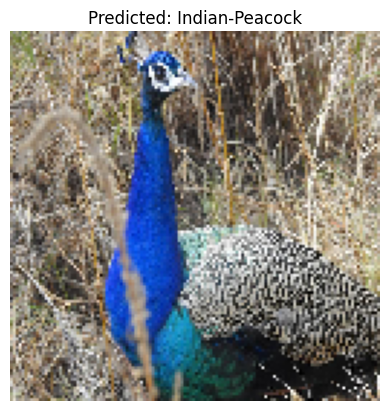

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Paths
model_path = 'checkpoint/final_model.keras'  # Path to the saved model
image_path = 'Peacock.jpg'  # Path to the image you want to predict

# Load the saved model
model = tf.keras.models.load_model(model_path)

# Parameters
img_height, img_width = 128, 128  # Same dimensions used in training

# Load and preprocess the image
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=-1)[0]

# Class names
class_names = [
    "Asian-Green-Bee-Eater", "Brown-Headed-Barbet", "Cattle-Egret", "Common-Kingfisher",
    "Common-Myna", "Common-Rosefinch", "Common-Tailorbird", "Coppersmith-Barbet",
    "Forest-Wagtail", "Gray-Wagtail", "Hoopoe", "House-Crow", "Indian-Grey-Hornbill",
    "Indian-Peacock", "Indian-Pitta", "Indian-Roller", "Jungle-Babbler", "Northern-Lapwing",
    "Red-Wattled-Lapwing", "Ruddy-Shelduck", "Rufous-Treepie", "Sarus-Crane",
    "White-Breasted-Kingfisher", "White-Breasted-Waterhen", "White-Wagtail"
]

# Get the predicted class name
predicted_class_name = class_names[predicted_class]

# Display the image and the prediction
plt.imshow(img)
plt.title(f'Predicted: {predicted_class_name}')
plt.axis('off')
plt.show()


### Loading Weights

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


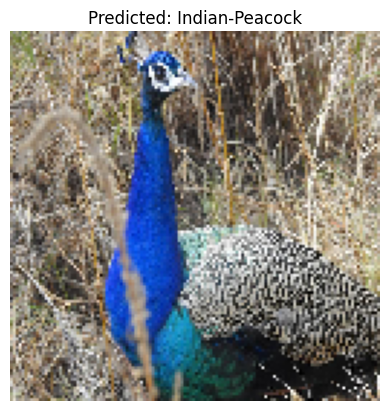

In [5]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

# Paths
model_weights_path = 'checkpoint/final_model.weights.h5'  # Path to the saved model weights
image_path = 'Peacock.jpg'  # Path to the image you want to predict

# Parameters
img_height, img_width = 128, 128  # Same dimensions used in training

# Load and prepare the model
num_classes = 25  # Update this with the actual number of classes
model = Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Rescaling(1./255),  # Rescale pixel values
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(num_classes)
])

# Compile the model (necessary before loading weights)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Load the trained weights
model.load_weights(model_weights_path)

# Load and preprocess the image
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=-1)[0]

# Map the predicted class index to the class name
class_names = [
    "Asian-Green-Bee-Eater", "Brown-Headed-Barbet", "Cattle-Egret", "Common-Kingfisher",
    "Common-Myna", "Common-Rosefinch", "Common-Tailorbird", "Coppersmith-Barbet",
    "Forest-Wagtail", "Gray-Wagtail", "Hoopoe", "House-Crow", "Indian-Grey-Hornbill",
    "Indian-Peacock", "Indian-Pitta", "Indian-Roller", "Jungle-Babbler", "Northern-Lapwing",
    "Red-Wattled-Lapwing", "Ruddy-Shelduck", "Rufous-Treepie", "Sarus-Crane",
    "White-Breasted-Kingfisher", "White-Breasted-Waterhen", "White-Wagtail"
]
predicted_class_name = class_names[predicted_class]

# Display the image and the prediction
plt.imshow(img)
plt.title(f'Predicted: {predicted_class_name}')
plt.axis('off')
plt.show()
